## Assignment 8: Unsupervised Learning







### 2nd April 2018





#### Team Members:
#### Prashant Wankhede (PRW19@pitt.edu)
#### Abhishek Shankarnarayanan (ABS100@pitt.edu)


For the following two data sets, originating from the Irvine Machine Learning Repository (http://archive.ics.uci.edu/ml/):

    Iris (http://archive.ics.uci.edu/ml/datasets/Iris)
    Congressional Voting Records (http://archive.ics.uci.edu/ml/datasets/Congressional+Voting+Records)

Build clustering models the result based on each of these algorithms:

    K-means (Bonus if initializing with K-means++)
    Gaussian Mixture Model
    Hierarchical Clustering

Note: You also need to demonstrate how to determine the number of clusters based on one of these methods: elbow, BIC, or Silhouette
Visualize both datasets based on each of these algorithms:

    PCA
    Autoencoder (t-sne)


In [63]:
# Required Python Machine learning Packages
import pandas as pd
import numpy as np

import scipy.special as spec # https://docs.scipy.org/doc/scipy/reference/special.html
import scipy.stats as st # https://docs.scipy.org/doc/scipy/reference/stats.html

# For preprocessing the data
from sklearn.preprocessing import Imputer
from sklearn import preprocessing
# To split the dataset into train and test datasets
from sklearn.cross_validation import train_test_split
# To calculate the accuracy score of the model
from sklearn.metrics import accuracy_score
#visualisation
import seaborn as sns # https://seaborn.pydata.org/api.html
%matplotlib inline
import matplotlib.pyplot as plt # https://matplotlib.org/api/pyplot_summary.html
from pandas.plotting import scatter_matrix

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn import model_selection
from sklearn.metrics import accuracy_score
from sklearn import svm
from sklearn.svm import SVC
import warnings; 
warnings.simplefilter('ignore')

In [2]:
h_df = pd.read_csv('C:\\Users\\work\\Desktop\\DA\\house_votes_84.csv',names = ['class_Name','handicapped_infants','water_project_cost_sharing','adoption_of_the_budget_resolution',
                   'physician_fee_freeze','el_salvador_aid','religious_groups_in_schools','anti_satellite_test_ban',
                   'aid_to_nicaraguan_contras','mx_missile','immigration','synfuels_corporation_cutback','education_spending',
                   'superfund_right_to_sue','crime','duty_free_exports','export_administration_act_south_africa'])

In [3]:
h_df.columns=['class_Name','handicapped_infants','water_project_cost_sharing','adoption_of_the_budget_resolution',
                   'physician_fee_freeze','el_salvador_aid','religious_groups_in_schools','anti_satellite_test_ban',
                   'aid_to_nicaraguan_contras','mx_missile','immigration','synfuels_corporation_cutback','education_spending',
                   'superfund_right_to_sue','crime','duty_free_exports','export_administration_act_south_africa']

In [4]:
h_df.head()

,class_Name,handicapped_infants,water_project_cost_sharing,adoption_of_the_budget_resolution,physician_fee_freeze,el_salvador_aid,religious_groups_in_schools,anti_satellite_test_ban,aid_to_nicaraguan_contras,mx_missile,immigration,synfuels_corporation_cutback,education_spending,superfund_right_to_sue,crime,duty_free_exports,export_administration_act_south_africa
0,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
1,republican,n,y,n,y,y,y,n,n,n,y,?,y,y,y,n,y
2,republican,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,?
3,democrat,?,y,y,?,y,y,n,n,n,n,y,n,y,y,n,n
4,democrat,n,y,y,n,?,y,n,n,n,n,y,n,y,n,n,y


In [5]:
h_df.describe()

,class_Name,handicapped_infants,water_project_cost_sharing,adoption_of_the_budget_resolution,physician_fee_freeze,el_salvador_aid,religious_groups_in_schools,anti_satellite_test_ban,aid_to_nicaraguan_contras,mx_missile,immigration,synfuels_corporation_cutback,education_spending,superfund_right_to_sue,crime,duty_free_exports,export_administration_act_south_africa
count,436,436,436,436,436,436,436,436,436,436,436,436,436,436,436,436,436
unique,3,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4
top,democrat,n,y,y,n,y,y,y,y,y,y,n,n,y,y,n,y
freq,267,236,195,253,247,212,272,239,242,207,216,264,233,209,248,233,269


In [6]:
h2_df=h_df.replace('?',-1)

In [7]:
h3_df = h2_df.replace('n',0)
h3_df.head()

,class_Name,handicapped_infants,water_project_cost_sharing,adoption_of_the_budget_resolution,physician_fee_freeze,el_salvador_aid,religious_groups_in_schools,anti_satellite_test_ban,aid_to_nicaraguan_contras,mx_missile,immigration,synfuels_corporation_cutback,education_spending,superfund_right_to_sue,crime,duty_free_exports,export_administration_act_south_africa
0,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
1,republican,0,y,0,y,y,y,0,0,0,y,-1,y,y,y,0,y
2,republican,0,y,0,y,y,y,0,0,0,0,0,y,y,y,0,-1
3,democrat,-1,y,y,-1,y,y,0,0,0,0,y,0,y,y,0,0
4,democrat,0,y,y,0,-1,y,0,0,0,0,y,0,y,0,0,y


In [8]:
h4_df = h3_df.replace('y',1)
h4_df.head()

,class_Name,handicapped_infants,water_project_cost_sharing,adoption_of_the_budget_resolution,physician_fee_freeze,el_salvador_aid,religious_groups_in_schools,anti_satellite_test_ban,aid_to_nicaraguan_contras,mx_missile,immigration,synfuels_corporation_cutback,education_spending,superfund_right_to_sue,crime,duty_free_exports,export_administration_act_south_africa
0,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
1,republican,0,1,0,1,1,1,0,0,0,1,-1,1,1,1,0,1
2,republican,0,1,0,1,1,1,0,0,0,0,0,1,1,1,0,-1
3,democrat,-1,1,1,-1,1,1,0,0,0,0,1,0,1,1,0,0
4,democrat,0,1,1,0,-1,1,0,0,0,0,1,0,1,0,0,1


In [9]:
h4_df["class_Name"] = pd.Categorical(h4_df["class_Name"])
h4_df["class_Name"] = h4_df["class_Name"].cat.codes

In [10]:
X = h4_df.drop('class_Name',axis=1)
Y = h4_df['class_Name']

# K Means

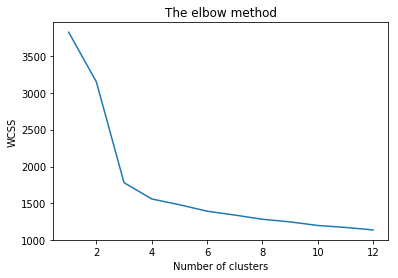

In [50]:
#Finding the optimum number of clusters for k-means classification
from sklearn.cluster import KMeans
wcss = []

for i in range(1, 13):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, random_state = 0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
    y_kmeans = kmeans.fit_predict(X)

#Plotting the results onto a line graph, allowing us to observe 'The elbow'
plt.plot(range(1, 13), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') #within cluster sum of squares
plt.show()

From the above graph, the optimum cluster is where the elbow occurs. This is when the within cluster sum of squares (WCSS) doesn't decrease significantly with every iteration.

In [45]:
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score
adj_rand_score = adjusted_rand_score(h4_df['class_Name'],y_kmeans)
print(adj_rand_score)

0.5456598110748861


In [46]:
y_kmeans

array([2, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1,

In [49]:
#Applying kmeans to the dataset / Creating the kmeans classifier
import sklearn.metrics as sm
kmeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, random_state = 0)
ykmeans=kmeans.fit_predict(X)
print("kmeans score:")
print(kmeans.score(X))
print("kmeans Rand index:")
print(sm.accuracy_score(h4_df['class_Name'],y_kmeans))
kmeans

kmeans score:
-1781.3739130434788
kmeans Rand index:
0.5045871559633027


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=0, tol=0.0001, verbose=0)

### PCA visualisation for Kmeans cluster
Since data is of 4 dimension we can use PCA to reduce to 2 dimension and visualise it easily.

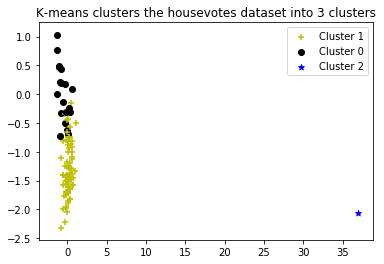

In [51]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import pylab as pl
pca = PCA(n_components=2).fit(X)
pca_2d = pca.transform(X)
for i in range(0, pca_2d.shape[0]):
    if kmeans.labels_[i] == 1:
         c1 = pl.scatter(pca_2d[i,0],pca_2d[i,1],c='y',
    marker='+')
    elif kmeans.labels_[i] == 0:
        c2 = pl.scatter(pca_2d[i,0],pca_2d[i,1],c='k',
    marker='o')
    elif kmeans.labels_[i] == 2:
        c3 = pl.scatter(pca_2d[i,0],pca_2d[i,1],c='b',
    marker='*')
pl.legend([c1, c2, c3],['Cluster 1', 'Cluster 0',
    'Cluster 2'])
pl.title('K-means clusters the housevotes dataset into 3 clusters')
pl.show()

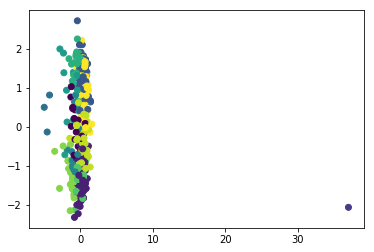

In [55]:
pca = PCA(n_components=2).fit(X)
pca_2d = pca.transform(X)
pl.scatter(pca_2d[:, 0], pca_2d[:, 1], c=kmeans.labels_)

### Autoencoder(T-SNE)  visualisation for Kmeans cluster
t-SNE  is a tool to visualize high-dimensional data.

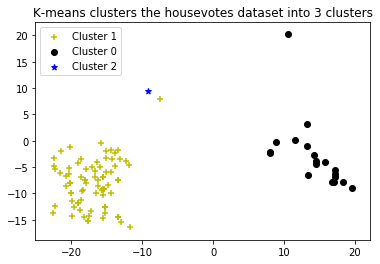

In [56]:
from sklearn.manifold import TSNE
tsne_2d = TSNE(n_components=2).fit_transform(X)
for i in range(0, tsne_2d.shape[0]):
    if kmeans.labels_[i] == 1:
         c1 = pl.scatter(tsne_2d[i,0],tsne_2d[i,1],c='y',
    marker='+')
    elif kmeans.labels_[i] == 0:
        c2 = pl.scatter(tsne_2d[i,0],tsne_2d[i,1],c='k',
    marker='o')
    elif kmeans.labels_[i] == 2:
        c3 = pl.scatter(tsne_2d[i,0],tsne_2d[i,1],c='b',
    marker='*')
pl.legend([c1, c2, c3],['Cluster 1', 'Cluster 0',
    'Cluster 2'])
pl.title('K-means clusters the housevotes dataset into 3 clusters')
pl.show()

# Hierarchial Cluster
Hierarchical clustering is an approach which builds a hierarchy from the bottom-up, and doesn’t require us to specify the number of clusters beforehand.

In [18]:
from scipy.cluster.hierarchy import dendrogram,linkage
Z = linkage(X, 'ward')

<function matplotlib.pyplot.show>

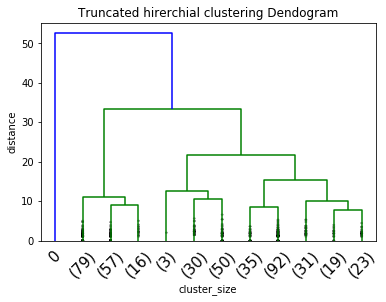

In [19]:
dendrogram(Z, truncate_mode ='lastp', p=12, leaf_rotation=45., leaf_font_size=15., show_contracted=True)
plt.title('Truncated hirerchial clustering Dendogram')
plt.xlabel('cluster_size')
plt.ylabel('distance')

plt.axhline(y=500)
plt.axhline(y=150)
plt.show

In [20]:
from sklearn.cluster import AgglomerativeClustering
k=2
hclustering=AgglomerativeClustering(n_clusters=k, affinity='euclidean', linkage='ward')
hclustering.fit_predict(X)
sm.accuracy_score(Y,hclustering.labels_)
adj_rand_score = adjusted_rand_score(Y,hclustering.labels_)
print(adj_rand_score)
print(hclustering.fit_predict(X))

0.010030486897437161
[1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


PCA

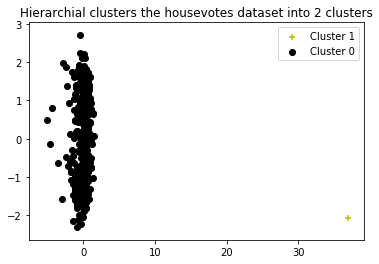

In [57]:
for i in range(0, pca_2d.shape[0]):
    if hclustering.labels_[i] == 1:
         c1 = pl.scatter(pca_2d[i,0],pca_2d[i,1],c='y',
    marker='+')
    elif hclustering.labels_[i] == 0:
        c2 = pl.scatter(pca_2d[i,0],pca_2d[i,1],c='k',
    marker='o')
pl.legend([c1, c2, c3],['Cluster 1', 'Cluster 0'])
pl.title('Hierarchial clusters the housevotes dataset into 2 clusters')
pl.show()

TSNE

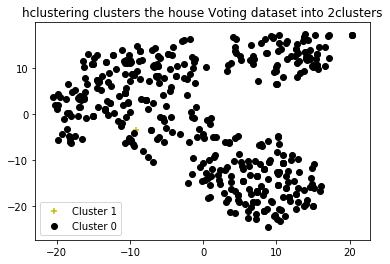

In [64]:
from sklearn.manifold import TSNE
tsne_2d = TSNE(n_components=2).fit_transform(X)
for i in range(0, tsne_2d.shape[0]):
    if hclustering.labels_[i] == 1:
         c1 = pl.scatter(tsne_2d[i,0],tsne_2d[i,1],c='y',
    marker='+')
    elif hclustering.labels_[i] == 0:
        c2 = pl.scatter(tsne_2d[i,0],tsne_2d[i,1],c='k',
    marker='o')
pl.legend([c1, c2],['Cluster 1', 'Cluster 0'])
pl.title('hclustering clusters the house Voting dataset into 2clusters')
pl.show()

# GMM
A GMM attempts to model the data as a collection of Gaussian blobs.

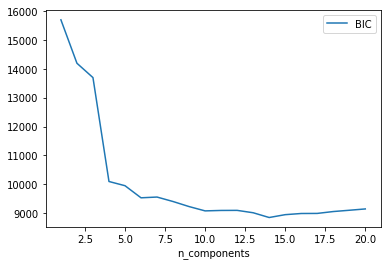

In [23]:
from sklearn.mixture import GaussianMixture 
n_components = np.arange(1, 21)
models = [GaussianMixture(n, covariance_type='spherical', random_state=0).fit(X)
          for n in n_components]

plt.plot(n_components, [m.bic(X) for m in models], label='BIC')
plt.legend(loc='best')
plt.xlabel('n_components');

In [24]:
from sklearn.mixture import GaussianMixture      # 1. Choose the model class
gmm = GaussianMixture(n_components=3,
            covariance_type='full')  # 2. Instantiate the model with hyperparameters
gmm.fit(X)                    # 3. Fit to data. Notice y is not specified!
y_gmm = gmm.predict(X)
print(gmm.score(X))
adj_rand_score = adjusted_rand_score(Y,y_gmm)
print(adj_rand_score)
print(y_gmm)

-6.973589013569554
0.4993579082437503
[1 2 2 2 0 2 2 2 2 2 0 2 2 0 0 2 2 0 0 2 0 0 0 0 0 0 0 0 0 2 0 2 0 0 2 0 2
 2 2 2 0 0 0 0 0 0 0 0 0 0 2 0 2 0 2 0 2 2 2 2 2 0 2 0 0 0 2 2 2 0 0 0 0 0
 2 0 2 2 2 2 2 0 0 2 2 2 2 2 2 2 2 0 0 0 0 2 2 2 2 0 2 2 2 2 2 0 0 2 0 0 0
 0 2 0 2 0 0 0 2 0 2 2 2 2 2 0 2 2 0 0 0 0 0 2 2 2 2 2 0 0 0 0 2 2 0 0 0 2
 0 2 0 2 2 0 0 2 2 2 0 2 0 2 2 2 2 2 0 2 2 2 0 0 2 0 2 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 2 0 2 2 0 0 0 2 0 2 0 0 0 0 0 0 2 0 2 2 0 0 0 2 0 0 2 2 2 2 0 0 0
 2 0 2 2 2 0 0 2 2 2 2 0 2 0 2 0 0 0 2 0 0 2 0 0 0 2 2 0 0 2 2 0 2 0 0 2 2
 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 2 2 2 2 2 2 2 0 2 2 2 0 0 0 0 2 2 0 0 0 0 0
 2 2 0 0 0 2 0 2 2 2 2 2 0 2 0 2 0 0 2 2 2 0 0 0 0 0 0 0 2 2 2 0 2 0 0 2 0
 0 0 0 2 0 0 0 2 2 0 0 2 0 2 2 2 0 2 0 2 0 2 0 0 2 2 0 2 0 2 0 2 2 2 0 2 0
 2 0 0 2 2 2 2 0 2 2 2 0 2 2 2 2 2 2 2 2 0 0 0 2 0 0 0 2 0 2 0 2 2 0 2 2 2
 2 2 0 2 2 0 2 2 0 0 2 0 0 0 2 2 0 0 0 0 0 2 0 0 2 0 2 2 2]


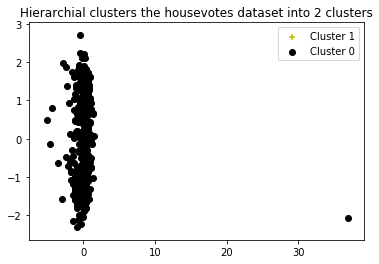

In [61]:
for i in range(0, pca_2d.shape[0]):
    if y_gmm.all() == 1:
         c1 = pl.scatter(pca_2d[i,0],pca_2d[i,1],c='w',
    marker='+')
    elif y_gmm.all()== 0:
        c2 = pl.scatter(pca_2d[i,0],pca_2d[i,1],c='k',
    marker='o')
    elif y_gmm.all()== 2:
        c2 = pl.scatter(pca_2d[i,0],pca_2d[i,1],c='b',
    marker='o')
pl.legend([c1, c2, c3],['Cluster 1', 'Cluster 0'])
pl.title('Hierarchial clusters the housevotes dataset into 2 clusters')
pl.show()